In [10]:
import glob
import shutil
import cv2 
from PIL import Image
import PIL
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from sklearn.model_selection import train_test_split

import warnings
# Ignore waring
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
emotion_path = ['/angry/*', '/fear/*', '/happy/*', '/sad/*', '/surprise/*', '/neutral/*']
Class_name = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']


In [12]:
 train_path = '/content/drive/MyDrive/Dataset/emotions/train'


<BarContainer object of 6 artists>

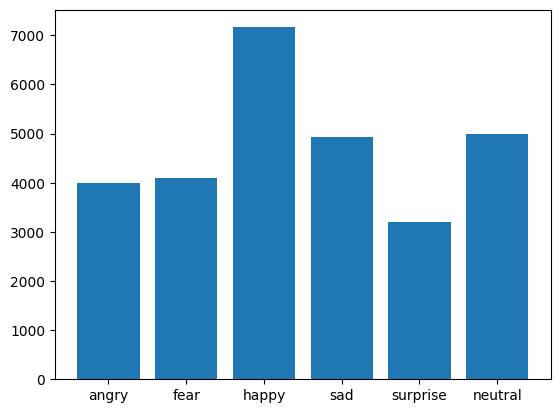

In [13]:
train_count=[]
for i in Class_name:
    train_count.append(len(os.listdir("/content/drive/MyDrive/Dataset/emotions/train/"+i+"/")))
plt.bar(Class_name,train_count)

In [14]:
X = []
y = []
for i, path in enumerate(emotion_path):
  for name in glob.glob(train_path+path):
    img = cv2.imread(name)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (48,48))
    X.append((img))
    y.append(i)
len(X)


28385

In [15]:
X = np.array(X)
y = np.array(y)

Chia dữ liệu thành train và test

In [16]:
(X_train,X_test,y_train,y_test) = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
(X_train,X_val,y_train,y_val) = train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [19]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_val.shape,y_val.shape)

(20437, 48, 48) (20437,)
(5677, 48, 48) (5677,)
(2271, 48, 48) (2271,)


Normalize Input

In [20]:
X_train = X_train /255
X_val = X_val /255
X_test = X_test / 255


Normalize output

In [21]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()
y_val = encoder.transform(y_val.reshape(-1,1)).toarray()
y_test = encoder.transform(y_test.reshape(-1,1)).toarray()

In [22]:
y_train[1]

array([0., 0., 1., 0., 0., 0.])

In [23]:
print(X_train.shape)

(20437, 48, 48)


Build Model

In [24]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from keras import regularizers

import cv2


In [25]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(6, activation='softmax'))



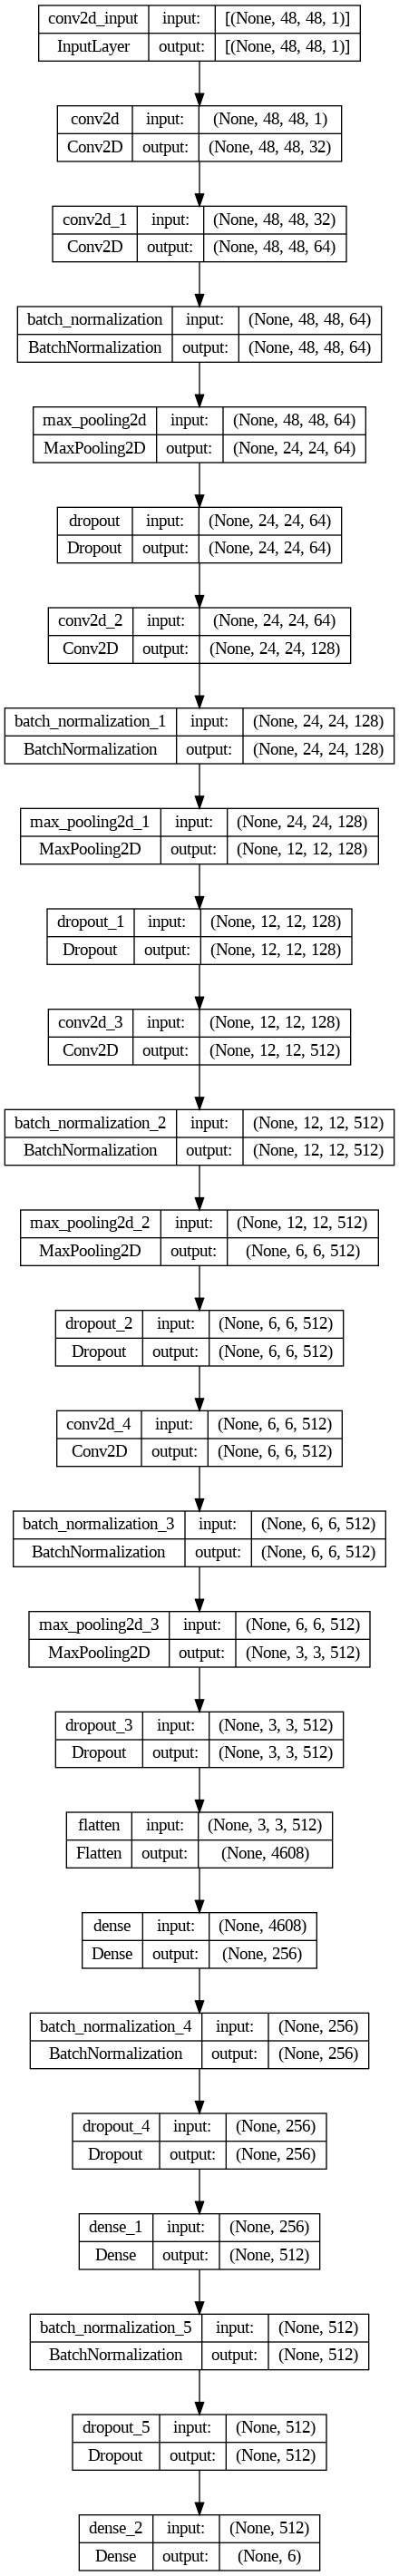

In [26]:
from keras.utils.vis_utils import plot_model 
plot_model(model,show_shapes=True,show_layer_names=True)

In [28]:
learning_rate = 0.0001  # Tốc độ học ban đầu

# Khởi tạo learning rate scheduler
optimizer1 = tf.keras.optimizers.Adam(learning_rate = 0.0001)

model.compile(optimizer = optimizer1, loss = 'categorical_crossentropy',metrics =['accuracy'])

history = model.fit(X_train, y_train,
          epochs=40,validation_data=(X_val, y_val),batch_size = 64,shuffle = True)

Epoch 1/40
320/320 [==============================] - 18s 41ms/step - loss: 9.1796 - accuracy: 0.2251 - val_loss: 8.7195 - val_accuracy: 0.2444
Epoch 2/40
320/320 [==============================] - 12s 37ms/step - loss: 8.2995 - accuracy: 0.2708 - val_loss: 7.9748 - val_accuracy: 0.2391
Epoch 3/40
320/320 [==============================] - 12s 37ms/step - loss: 7.4530 - accuracy: 0.3184 - val_loss: 7.0193 - val_accuracy: 0.3470
Epoch 4/40
320/320 [==============================] - 12s 37ms/step - loss: 6.6382 - accuracy: 0.3505 - val_loss: 6.0694 - val_accuracy: 0.4060
Epoch 5/40
320/320 [==============================] - 12s 37ms/step - loss: 5.8681 - accuracy: 0.3812 - val_loss: 5.4275 - val_accuracy: 0.4227
Epoch 6/40
320/320 [==============================] - 12s 38ms/step - loss: 5.1787 - accuracy: 0.4114 - val_loss: 4.7775 - val_accuracy: 0.4553
Epoch 7/40
320/320 [==============================] - 13s 39ms/step - loss: 4.5634 - accuracy: 0.4350 - val_loss: 4.2458 - val_accuracy:

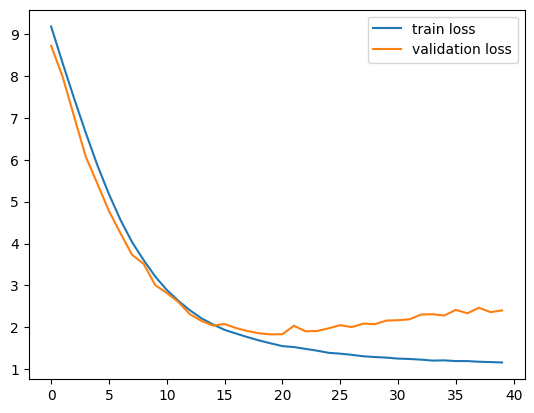

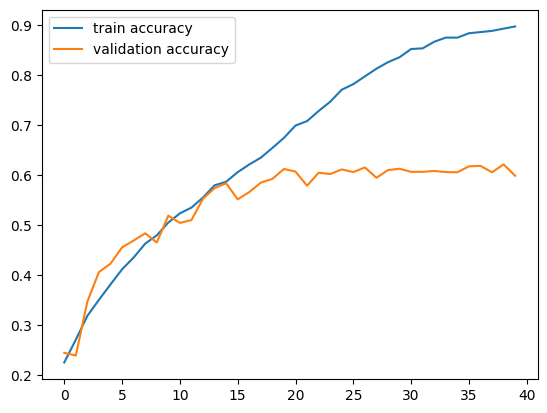

In [29]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [30]:
model.save('model_emotions_final_67.h5')

In [31]:
from tensorflow.keras.models import load_model
model1 = load_model('model_emotions_final_67.h5')

In [32]:
train_loss, train_acc = model1.evaluate(X_train, y_train)
test_loss, test_acc   = model1.evaluate(X_test, y_test)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

178/178 [==============================] - 2s 8ms/step - loss: 2.4169 - accuracy: 0.5996
final train accuracy = 98.12 , validation accuracy = 59.96


In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_hat = model1.predict(X_test)
y_test1 =np.argmax(y_test,axis =1)
y_hat1 = np.argmax(y_hat,axis =1)
print(classification_report(y_test1, y_hat1))

178/178 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.47      0.53      0.50       783
           1       0.42      0.49      0.45       812
           2       0.87      0.75      0.80      1475
           3       0.47      0.50      0.48       958
           4       0.78      0.74      0.76       679
           5       0.56      0.51      0.53       970

    accuracy                           0.60      5677
   macro avg       0.59      0.59      0.59      5677
weighted avg       0.62      0.60      0.61      5677



[[ 418  107   35  131   22   70]
 [ 118  400   29  143   54   68]
 [  77   60 1106   87   35  110]
 [ 136  185   32  480    9  116]
 [  21   95   21   13  505   24]
 [ 115  113   52  175   20  495]]


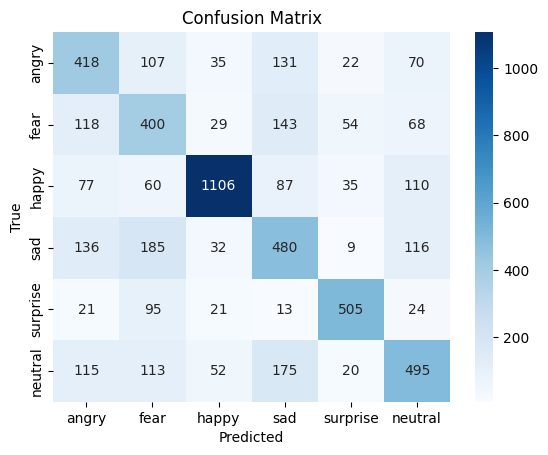

In [34]:
import seaborn as sns

cm = confusion_matrix(y_test1, y_hat1)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Cấu hình trục x và trục y
tick_labels = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
plt.xticks(np.arange(len(tick_labels)) + 0.5, tick_labels)
plt.yticks(np.arange(len(tick_labels)) + 0.5, tick_labels)

# Đặt tên cho các trục
plt.xlabel('Predicted')
plt.ylabel('True')

# Hiển thị biểu đồ
plt.title('Confusion Matrix')
plt.show()